In [2]:
import numpy as np
import pandas as pd
import eli5
import re
import sklearn
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import  tabulate
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import VotingClassifier
import contractions
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
import tensorflow as tfimport numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer


In [ ]:
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print("Num GPUs Available: ", num_gpus_available)
assert num_gpus_available > 0

In [ ]:
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

In [4]:
df = tfds.as_dataframe(ds)

In [6]:
df_new = df[df['data/star_rating'] != 3]
df = df_new
df["Sentiment"] = df["data/star_rating"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})
df['review'] =df['data/review_body'].str.decode('uft-8')
df.head()

,Unnamed: 0,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine,Sentiment,review
0,0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1,0,NaN
1,1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1,1,NaN
2,2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1,1,NaN
3,3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1,1,NaN
5,5,b'52220668',4,b'US',b'Mobile_Electronics',b'B00IMFYGKK',b'18021167',b'Blacksys CW-100 Car Camera CCTV GPS Car Dash...,"b""Excellent product !!!<br />Easy to install a...",b'2014-08-12',b'Excellent product!',b'R3SB7ZKI69PIW9',5,6,0,1,1,NaN


In [ ]:
df2 = df[["review", "Sentiment"]]

In [7]:
def clean_review (text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = contractions.fix(text)

    return text


df2['review_clean'] = df2['review'].apply(clean_review)



In [8]:
df2[['review_clean']]

,review_clean
0,Does not work
1,This is a great wiring kit i used it to set up...
2,It works great so much faster than USB charger...
3,This product was purchased to hold a monitor o...
4,Excellent product br Easy to install and perfo...
...,...
95236,It s a wonderful invention You don t need to w...
95237,This is not good item I can even maket work th...
95238,The cover and skin were both exactly like the ...
95239,I ordered of these cords for both mine and my ...


In [ ]:
#Combine all reviews
text = " ".join(review for review in df2.review)
print ("There are {} words in the combination of all review.".format(len(text)))

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(50)



In [ ]:
#Conver to lower case
text = text.lower()
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(50)

In [ ]:
#stemming
from nltk.stem import PorterStemmer

stemmer= PorterStemmer()

for word in tokens[1:10]:
    print(stemmer.stem(word))

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

for word in tokens[1:100]:
    print(lemmatizer.lemmatize(word))

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br","one","case","will","product"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
vader = SentimentIntensityAnalyzer()
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']
    
def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [103]:
vader.polarity_scores(df2.review_clean[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [104]:
df2_vader = df2.copy()
df2_vader['tb_polarity'] = df2_vader.review_clean.apply(detect_tb_polarity)
df2_vader['tb_subjectivity'] = df2_vader.review_clean.apply(detect_tb_subjectivity)
df2_vader['vader_pos'] = df2_vader.review_clean.apply(detect_vader_pos)
df2_vader['vader_neg'] = df2_vader.review_clean.apply(detect_vader_neg)
df2_vader['vader_comp'] = df2_vader.review_clean.apply(detect_vader_comp)

df2_vader_clean = df2_vader.drop(['Unnamed: 0', 'review'], axis=1, inplace=False)
df2_vader_clean.iloc[:,0:]



In [105]:



df2_vader_clean = df2_vader.drop(['Unnamed: 0', 'review'], axis=1, inplace=False)


In [106]:
df2_vader_clean.iloc[:,0:]

,Sentiment,review_clean,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,0,Does not work,0.000000,0.000000,0.000,0.000,0.0000
1,1,This is a great wiring kit i used it to set up...,0.252381,0.598413,0.135,0.021,0.8450
2,1,It works great so much faster than USB charger...,0.500000,0.650000,0.321,0.000,0.7964
3,1,This product was purchased to hold a monitor o...,1.000000,1.000000,0.196,0.000,0.7650
4,1,Excellent product br Easy to install and perfo...,0.630556,0.744444,0.326,0.000,0.9468
...,...,...,...,...,...,...,...
95236,1,It s a wonderful invention You don t need to w...,0.178125,0.825000,0.157,0.048,0.7096
95237,0,This is not good item I can even maket work th...,-0.350000,0.600000,0.045,0.192,-0.6814
95238,1,The cover and skin were both exactly like the ...,0.252500,0.532500,0.251,0.000,0.8555
95239,0,I ordered of these cords for both mine and my ...,-0.050000,0.200000,0.028,0.079,-0.4700


In [107]:
def train_test_vader(dataset):
    train, test = train_test_split(dataset, test_size=0.3, random_state=42)
    train_x = train.iloc[:,2:]
    train_y = train["Sentiment"]
    test_x = test.iloc[:,2:]
    test_y = test["Sentiment"]
    return train_x, train_y, test_x, test_y


In [108]:
train_x_vader, train_y_vader, test_x_vader, test_y_vader = train_test_vader(df2_vader_clean)

In [189]:
# vader logistic regression
model_lr_vader = LogisticRegression()
model_lr_vader.fit(train_x_vader, train_y_vader)
pred_vader = model_lr_vader.predict(test_x_vader)

confusion_matrix(test_y_vader, pred_vader)
print("accuracy: ", model_lr_vader.score(test_x_vader, test_y_vader))
print("f1 score: ", f1_score(test_y_vader, pred_vader,average='macro'))

accuracy:  0.8424036677982711
f1 score:  0.7839311358547245


In [188]:
# vader decision tree
model_dt_vader = DecisionTreeClassifier()
model_dt_vader.fit(train_x_vader, train_y_vader)
pred_vader = model_dt_vader.predict(test_x_vader)

confusion_matrix(test_y_vader, pred_vader)
print("accuracy: ", model_dt_vader.score(test_x_vader, test_y_vader))
print("f1 score: ", f1_score(test_y_vader, pred_vader,average='macro'))

accuracy:  0.7878766667833269
f1 score:  0.7238774752788033


In [112]:
def train_test(dataset):
    train, test = train_test_split(dataset, test_size=0.3, random_state=42)
    train_x = train["review_clean"].astype(str).to_list()
    train_y = train["Sentiment"].to_list()
    test_x = test["review_clean"].astype(str).to_list()
    test_y = test["Sentiment"].to_list()
    return train_x, train_y, test_x, test_y

    

In [113]:
train_x, train_y, test_x, test_y = train_test(df2)


In [167]:
# logistsic regression
lr_model = LogisticRegression(C=1, solver='newton-cg')
lr_features = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# lr_features = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
lr_classifer = make_pipeline(lr_features, lr_model)
lr_classifer.fit(train_x, train_y)


# decision tree
dt_model = DecisionTreeClassifier()
dt_features = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# dt_features = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
dt_classifer = make_pipeline(dt_features, dt_model)
dt_classifer.fit(train_x, train_y)



# Random forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_features = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# rf_features = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
rf_classifer = make_pipeline(rf_features, rf_model)
rf_classifer.fit(train_x, train_y)




Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('randomforestclassifier', RandomForestClassifier())])

In [187]:
# logist regression metrics
train_predict_lr= lr_classifer.predict(train_x)
lr_train_f1 = f1_score(train_y, train_predict_lr, average='macro')
test_pred_lr = lr_classifer.predict(test_x)
lr_test_f1 = f1_score(test_y, test_pred_lr, average='macro')


lr_confusion_matrix = confusion_matrix(test_y, test_pred_lr)
lr_confusion_report = classification_report(test_y, test_pred_lr)
print("Logistic Regression confusion matrix: \n", lr_confusion_matrix)
print("Logistic Regression confusion report: \n", lr_confusion_report)
print("Train/test f1 for Logistic Regression:", lr_train_f1, lr_test_f1)
print ("Train/Test Accuracy for Logistic Regression", lr_classifer.score(train_x, train_y), lr_classifer.score(test_x, test_y))


# sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues')



Logistic Regression confusion matrix: 
 [[ 5831  1603]
 [  849 20290]]
Logistic Regression confusion report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.83      7434
           1       0.93      0.96      0.94     21139

    accuracy                           0.91     28573
   macro avg       0.90      0.87      0.88     28573
weighted avg       0.91      0.91      0.91     28573

Train/test f1 for Logistic Regression: 0.9930207438243355 0.8846454677094489
Train/Test Accuracy for Logistic Regression 0.9946301073978521 0.9141847198404088


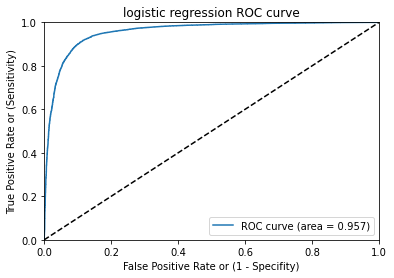

In [201]:
# logist regression roc

y_socre_lr = lr_classifer.decision_function(test_x)
fpr, tpr, _= roc_curve(test_y, y_socre_lr,pos_label= lr_classifer.classes_[1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('logistic regression ROC curve')
plt.legend(loc="lower right")

Decision Tree confusion matrix: 
 [[ 4995  2439]
 [ 2129 19010]]
Decision Tree confusion report: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.69      7434
           1       0.89      0.90      0.89     21139

    accuracy                           0.84     28573
   macro avg       0.79      0.79      0.79     28573
weighted avg       0.84      0.84      0.84     28573

Train/test f1 for Decision Tree: 0.9977674322677581 0.789480186798077
Train/Test Accuracy for Decision Tree: 0.99827503449931 0.8401287929163896


<AxesSubplot:>

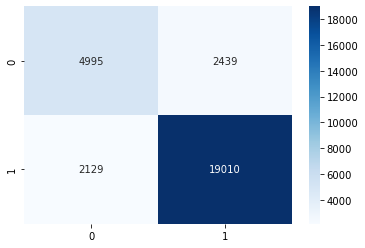

In [170]:
# decision tree metrics
dt_predicted = dt_classifer.predict(train_x)
dt_train_f1 = f1_score(train_y, dt_predicted, average='macro')
dt_test_predicted = dt_classifer.predict(test_x)
dt_test_f1 = f1_score(test_y, dt_test_predicted, average='macro')

dt_confusion_matrix = confusion_matrix(test_y, dt_test_predicted)
dt_confusion_report = classification_report(test_y, dt_test_predicted)

print("Decision Tree confusion matrix: \n", dt_confusion_matrix)
print("Decision Tree confusion report: \n", dt_confusion_report)
print("Train/test f1 for Decision Tree:", dt_train_f1,dt_test_f1 )
print("Train/Test Accuracy for Decision Tree:", dt_classifer.score(train_x, train_y), dt_classifer.score(test_x, test_y))


# sns.heatmap(dt_confusion_matrix,annot= True,fmt='d', cmap='Blues')

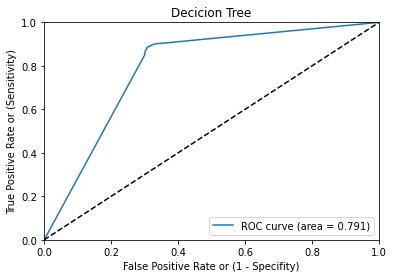

In [173]:
# decision tree roc
y_score_dt = dt_classifer.predict_proba(test_x)[:,1]
fpr, tpr, _= roc_curve(test_y, y_score_dt,pos_label= dt_classifer.classes_[1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Decicion Tree')
plt.legend(loc="lower right")

Random Forest confusion matrix: 
 [[ 4413  3021]
 [  383 20756]]
Random Forest confusion report: 
               precision    recall  f1-score   support

           0       0.92      0.59      0.72      7434
           1       0.87      0.98      0.92     21139

    accuracy                           0.88     28573
   macro avg       0.90      0.79      0.82     28573
weighted avg       0.89      0.88      0.87     28573

Train/test f1 for Random Forest: 0.99774730944497 0.8229410589783039
Train/Test Accuracy for Random Forest: 0.998260034799304 0.8808665523396213


<AxesSubplot:>

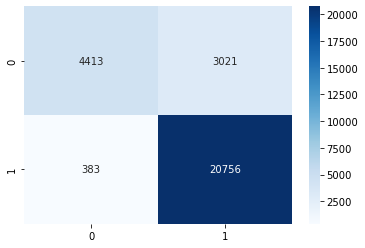

In [174]:
# Random forest metrics
rf_predicted = rf_classifer.predict(train_x)
rf_train_f1 = f1_score(train_y, rf_predicted, average='macro')
rf_test_predicted = rf_classifer.predict(test_x)
rf_test_f1 = f1_score(test_y, rf_test_predicted, average='macro')

rf_confusion_matrix = confusion_matrix(test_y, rf_test_predicted)
rf_confusion_report = classification_report(test_y, rf_test_predicted)

print("Random Forest confusion matrix: \n", rf_confusion_matrix)
print("Random Forest confusion report: \n", rf_confusion_report)
print("Train/test f1 for Random Forest:", rf_train_f1, rf_test_f1)
print("Train/Test Accuracy for Random Forest:", rf_classifer.score(train_x, train_y), rf_classifer.score(test_x, test_y))

# sns.heatmap(rf_confusion_matrix,annot= True,fmt='d', cmap='Blues')


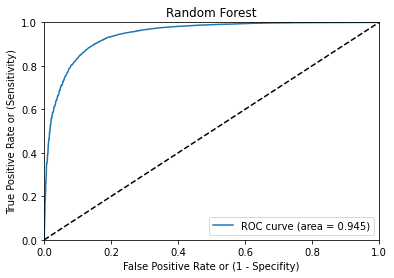

In [176]:
# Random forest roc
y_score_rf = rf_classifer.predict_proba(test_x)[:,1]
fpr, tpr, _= roc_curve(test_y, y_score_rf,pos_label= rf_classifer.classes_[1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Random Forest')
plt.legend(loc="lower right")

In [200]:
eli5.show_weights(lr_classifer, top=20,target_names=['negative', 'positive'])


c:\Users\steve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

eli5.show_weights(dt_classifer, top=20,target_names=['negative', 'positive'])

In [196]:
eli5.show_weights(rf_classifer, top=20,target_names=['negative', 'positive'])

c:\Users\steve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight,Feature
0.0122 ± 0.0259,great
0.0071 ± 0.0179,work
0.0057 ± 0.0155,return
0.0054 ± 0.0172,waste money
0.0052 ± 0.0105,did
0.0050 ± 0.0105,love
0.0049 ± 0.0142,waste
0.0049 ± 0.0090,junk
0.0048 ± 0.0151,money
0.0046 ± 0.0080,works


In [182]:
# ensemble
ensemble_classifier = VotingClassifier(estimators=[('lr', lr_classifer), ('dt', dt_classifer)], voting='soft')
ensemble_classifier.fit(train_x, train_y)



VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('countvectorizer',
                                               CountVectorizer(ngram_range=(1,
                                                                            2),
                                                               stop_words='english')),
                                              ('logisticregression',
                                               LogisticRegression(C=1,
                                                                  solver='newton-cg'))])),
                             ('dt',
                              Pipeline(steps=[('countvectorizer',
                                               CountVectorizer(ngram_range=(1,
                                                                            2),
                                                               stop_words='english')),
                                              ('decisiontreeclassifier',
                                               DecisionTreeClassifier())]))],
                 voting='soft')

In [183]:
# ensmeble metrics
train_ensemble_predicted = ensemble_classifier.predict(train_x)
train_ensemble_f1 = f1_score(train_y, train_ensemble_predicted, average='macro')
test_ensemble_predicted = ensemble_classifier.predict(test_x)
test_ensemble_f1 = f1_score(test_y, test_ensemble_predicted, average='macro')

ensemble_confusion_matrix = confusion_matrix(test_y, test_ensemble_predicted)
ensemble_confusion_report = classification_report(test_y, test_ensemble_predicted)

print("Ensemble confusion matrix: \n", ensemble_confusion_matrix)
print("Ensemble confusion report: \n", ensemble_confusion_report)
print("Train/test f1 for Ensemble:", train_ensemble_f1, test_ensemble_f1)
print("Train/Test Accuracy for Ensemble:", ensemble_classifier.score(train_x, train_y), ensemble_classifier.score(test_x, test_y))



Ensemble confusion matrix: 
 [[ 5028  2406]
 [ 2077 19062]]
Ensemble confusion report: 
               precision    recall  f1-score   support

           0       0.71      0.68      0.69      7434
           1       0.89      0.90      0.89     21139

    accuracy                           0.84     28573
   macro avg       0.80      0.79      0.79     28573
weighted avg       0.84      0.84      0.84     28573

Train/test f1 for Ensemble: 0.9977461395648948 0.7932197351141002
Train/Test Accuracy for Ensemble: 0.998260034799304 0.8431036293003885


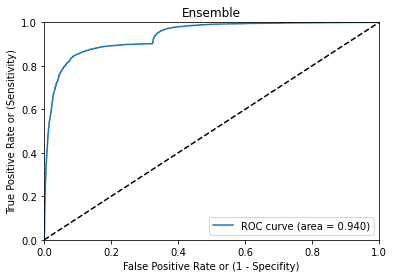

In [186]:
# ensmeble roc
y_socre_ensemble = ensemble_classifier.predict_proba(test_x)[:,1]
fpr, tpr, _= roc_curve(test_y, y_socre_ensemble,pos_label= ensemble_classifier.classes_[1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Ensemble')
plt.legend(loc="lower right")
